# Faster coding

In [5]:
import math as m
import numpy as np

## Evaluating performance

### Use timeit linemagic to evaluate options:

This is useful for find the quickest options to use within loops

In [15]:
%%timeit -n100000
m.sqrt(9 + 12)

167 ns ± 17.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%%timeit -n100000
(9 + 12)**0.5

19.4 ns ± 5.26 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Use import time to test performance of longer pieces of code and find bottlenecks:

--- 0.0021426927584684563 seconds ---
--- 0.021827596919536063 seconds ---


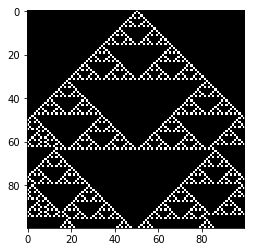

In [23]:
#import
import numpy as np
from scipy.ndimage.filters import convolve
import matplotlib.pyplot as plt
import time

#timing
start_time = time.clock() 

#generate
width = 100 ; timesteps = 100
array = np.zeros((width,timesteps),dtype=float)
array[width//2,0] = 1
kernel = [-1,0,1]
for t in range(timesteps-1):
    array[:,t+1] = abs(convolve(array[:,t],kernel, mode='constant', cval=0))

#get time
print("--- %s seconds ---" % (time.clock() - start_time)) 

#plot
plt.imshow(array.T, aspect='equal', interpolation='none',cmap = 'gray')

print("--- %s seconds ---" % (time.clock() - start_time)) 

plt.show()

## Use inbuilt numpy/scipy methods - avoid loops wherever possible:

In [33]:
%%timeit -n10
a = np.random.rand(100,100)
for x in range(a.shape[0]):
    for y in range(a.shape[1]):
        a[x,y] += 5

5.57 ms ± 788 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [34]:
%%timeit -n10
a = np.random.rand(100,100)
a += 5

104 µs ± 11.5 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## DON'T use inbuilt numpy/scipy methods - unpack simple cases:

In [41]:
array = np.array([2,10,11])

In [42]:
%%timeit -n100000
np.linalg.norm(array)

4.65 µs ± 194 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [43]:
%%timeit -n100000
(array[0] + array[1] + array[2])**-0.5

2.69 µs ± 94.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Pre-processing

Do as many calculations outside of loops as possible, and avoid slow if statements.

### Rule 90:

In [45]:
getbelow_arr = np.zeros((2,2,2),dtype=int)
getbelow_arr[1,1,0] = 1
getbelow_arr[0,1,1] = 1
getbelow_arr[1,0,0] = 1
getbelow_arr[0,0,1] = 1

def getbelow(left,middle,right):
    if left == 1:
        if middle == 1:
            if right == 1:
                below = 0
            elif right == 0:
                below = 1
        elif middle == 0:
            if right == 1:
                below = 0
            elif right == 0:
                below = 1
    elif left == 0:
        if middle == 1:
            if right == 1:
                below = 1
            elif right == 0:
                below = 0
        elif middle == 0:
            if right == 1:
                below = 1
            elif right == 0:
                below = 0  
    return below

In [49]:
%%timeit -n100000
getbelow(1,1,0)

202 ns ± 26.5 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [50]:
%%timeit -n100000
getbelow_arr[1,1,0]

164 ns ± 36 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Masking

This is a useful tool in general but we can use it to save time, for example if we wanted to find all points within a certain distance of another point.

Instead of repeating this calcuation every time, we can use the fact that the shapes of the points selected will always be the same, so we just need to define a load of circular masks and shift them to the desired point.

Just like minecraft...

![](https://i.imgur.com/9PGer.jpg)

### Other examples

Here's a cool example of how doing pre-processing allows you to make an O(1) nearest neighbour algorithm: https://tavianator.com/aesa/

## Minimise I/O, particularly within loops

This includes the print function as well as pickle/np saves and writing to text files

In [60]:
import time

t0 = time.clock()

for n in range(100):
    print(n)
    
t1 = time.clock()

a = []
for n in range(100):
    a.append(n)
    
print(a)

t2 = time.clock()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [61]:
print (t1 - t0, t2 - t1)

0.0017262334990846284 0.0002834291453837068


## Find a trick

e.g. Rule 90 is just an XOR for the outer two cells

![](http://mathworld.wolfram.com/images/eps-gif/ElementaryCARule090_1000.gif)